### Creating Twitter Dataset with GetOldTweets3

In [109]:
import GetOldTweets3 as got

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [38]:
pd.set_option('display.max_rows', 100)
pd.options.display.max_colwidth = 150

In [42]:
tweetCriteria = got.manager.TweetCriteria().setQuerySearch("depressed")\
                                           .setSince("2019-06-06")\
                                           .setUntil("2020-06-06")\
                                           .setNear('New York')\
                                           .setMaxTweets(20_000)
                                    

tweet_object = got.manager.TweetManager.getTweets(tweetCriteria)

In [74]:
text = []
split_text = []

In [75]:
for items in tweet_object:
    text.append(items.text)
for words in text:
    split_text.append(words.split())

In [80]:
unique_text = []

for items in split_text:
    unique_text.append(set(items))

In [82]:
unique_text

[{'Booooo',
  'Does',
  'Is',
  'So',
  'actual',
  'all',
  'bubbles?',
  'can',
  'depress',
  'destroyed?',
  'everything',
  'exist?',
  'gets',
  'have',
  'influence',
  'it',
  'just',
  'knowing',
  'like',
  'little',
  'more',
  'never',
  'of',
  'pretend',
  'real',
  'same.',
  'semblance',
  'some',
  'stick',
  'that',
  'the',
  'to',
  'want',
  'was',
  'while',
  'why',
  'will',
  'wish',
  'world',
  'you',
  'your'},
 {'#badrelationships',
  '#depressed',
  '#helpme',
  '#helpmefindmyself',
  '#helpmelooseweight',
  '#imlonely',
  '#imlonelyforever',
  '#nyc…',
  '#teens',
  '#unhappymarriage',
  '#why',
  '#whyme',
  'Certified',
  'Coaches',
  'Get',
  'Health',
  'by!',
  'https://www.instagram.com/p/CBEnUpklspC/?igshid=11904i0lfg8lk',
  'need',
  'standing',
  'support',
  'the',
  'today.',
  'you'},
 {'It’s',
  'Man',
  'This',
  'Where',
  'and',
  'are',
  'children',
  'corroded',
  'danger',
  'depress',
  'do',
  'from',
  'home.',
  'how',
  'ignorance

In [44]:
tweet_dict = list(map(lambda x: {'text': x.text, 'user': x.username,
                                 'date': x.date, 'retweet': x.retweets,
                                 'mention': x.mentions, 'hashtags': x.hashtags,
                                 'location' : x.geo}, tweet_object))


In [46]:
df = pd.DataFrame(tweet_dict)

In [58]:
df[df['retweet'] > 1].sort_values(by = 'retweet', ascending = False).head(200)

,text,user,date,retweet,mention,hashtags,location
206,"#BlackLivesMatter #MatthewTucker, a biracial 18-yr-old was depressed and suicidal over a break-up. Police walked into his family home. But instead...",Earthatone,2020-06-04 20:06:29+00:00,8047,,#BlackLivesMatter #BlackLivesMatter #MatthewTucker,
4563,david koch’s death is really fucking me up. i’ve been so depressed lately due in no small part to the ways in which he made the world worse that i...,BrandyLJensen,2019-08-23 13:18:57+00:00,610,,,
3899,"Sad when you realize you’re actually not depressed, you’re just lazy.",marknorm,2019-10-14 16:56:04+00:00,466,,,
4897,"oh so the depressed boy horse can go off for 6 seasons but the deranged girl birds don’t even get 2, huh",EmmaSpecter,2019-07-24 23:54:55+00:00,392,,,
1130,Sometimes I get depressed then I remember oh silly me I'm 6'2,TheSNEAKO,2020-05-19 16:10:17+00:00,228,,,
...,...,...,...,...,...,...,...
3515,twitter during dark is my favorite tho cause everybody be either depressed or horny or both. and i can tweet what i want and delete it before the ...,LeKiidd,2019-11-13 22:21:14+00:00,4,,,
3683,aw i wish i wasn’t too morbidly depressed to put a little costume on,dan_allegretto,2019-10-31 22:54:49+00:00,4,,,
1554,"I'm tired, depressed, irritable, a sleepy bitch. None it is personal, what don't people UNDERSTAND",wassupwhit,2020-04-15 01:14:34+00:00,4,,,
3852,depressed asf,amiramonae_,2019-10-19 04:03:38+00:00,4,,,


In [35]:
df.shape

(3580, 7)

### Cleaning and analyzing text data 

In [85]:
def remove_urls(df):
    df['text'] = df['text'].str.replace(r"http\S+", "")

remove_urls(df)

In [89]:
df['text'].str.contains('http').describe()

count      5456
unique        1
top       False
freq       5456
Name: text, dtype: object

In [94]:
#creating list of stop words to be removed from body of tweet texts. Punctuation and 
tokenizer = RegexpTokenizer(r'(?u)(?<![@])#?\b\w\w+\b')
sw_list = stopwords.words('english')
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©',
            '-', '–', '—', 'co', 'û_','ûï', 'amp', 'get', 'new', 'one', 'go', 'rt', 'gt']
sw_set = set(sw_list)

In [96]:
len(sw_list)

203

In [97]:
len(sw_set)

201

In [98]:
def process_text(text):
    tokens = tokenizer.tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed

In [99]:
df['text'] = df['text'].apply(process_text)

In [101]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(df_text):
    lemmatized_review=[]
    for w in df_text:
        lemmatized_review.append(lemmatizer.lemmatize(w))
    return lemmatized_review

In [102]:
df['text'] = df['text'].apply(lemmatize_text)

In [103]:
df['text']

0       [booooo, depress, knowing, world, want, never, exist, stick, little, bubble, pretend, like, semblance, actual, influence, everything, wish, real, ...
1       [support, need, today, certified, health, coach, standing, #helpmefindmyself, #helpme, #helpmelooseweight, #imlonely, #imlonelyforever, #depressed...
2                                                                      [danger, ignorance, corroded, home, child, learning, live, right, wrong, man, depress]
3                                                                                                                 [ima, miss, boy, much, ima, depressed, asf]
4        [sad, depressed, week, straight, need, listen, listening, #michaeljackson, #invincible, #invinciblealbum, michael, jackson, black, american, #mjfam]
                                                                                ...                                                                          
5451                                                

In [104]:
all_words = [word for tokens in df['text'] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df['text']]
vocab = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(vocab)))
print("Max sentence length is %s" % max(sentence_lengths))

60878 words total, with a vocabulary size of 9873
Max sentence length is 46


In [107]:
sentence_lengths

[20,
 19,
 11,
 7,
 15,
 22,
 7,
 21,
 12,
 4,
 5,
 12,
 12,
 13,
 21,
 7,
 5,
 1,
 3,
 5,
 7,
 18,
 8,
 16,
 2,
 2,
 10,
 23,
 12,
 3,
 12,
 17,
 8,
 10,
 19,
 11,
 8,
 11,
 6,
 18,
 19,
 11,
 10,
 4,
 24,
 22,
 23,
 22,
 9,
 8,
 21,
 24,
 9,
 2,
 6,
 6,
 6,
 19,
 3,
 10,
 11,
 24,
 6,
 9,
 18,
 8,
 12,
 12,
 4,
 5,
 11,
 11,
 8,
 8,
 11,
 15,
 24,
 7,
 3,
 4,
 22,
 2,
 12,
 24,
 16,
 12,
 17,
 26,
 6,
 6,
 18,
 22,
 1,
 16,
 6,
 24,
 4,
 7,
 26,
 16,
 17,
 6,
 5,
 23,
 16,
 25,
 27,
 15,
 25,
 8,
 23,
 6,
 2,
 2,
 26,
 2,
 11,
 21,
 5,
 26,
 24,
 8,
 15,
 6,
 11,
 10,
 3,
 23,
 21,
 8,
 8,
 20,
 3,
 3,
 11,
 13,
 28,
 3,
 1,
 13,
 7,
 6,
 11,
 9,
 3,
 19,
 6,
 4,
 2,
 12,
 5,
 3,
 3,
 7,
 4,
 4,
 7,
 18,
 23,
 25,
 8,
 7,
 17,
 6,
 23,
 9,
 9,
 10,
 3,
 16,
 6,
 8,
 5,
 7,
 17,
 14,
 7,
 7,
 4,
 6,
 25,
 25,
 2,
 8,
 26,
 6,
 19,
 11,
 17,
 1,
 6,
 23,
 4,
 11,
 5,
 16,
 4,
 7,
 9,
 13,
 5,
 11,
 8,
 5,
 25,
 18,
 25,
 28,
 6,
 16,
 11,
 24,
 24,
 17,
 6,
 6,
 8,
 6,
 20,
 26,
 12,
 

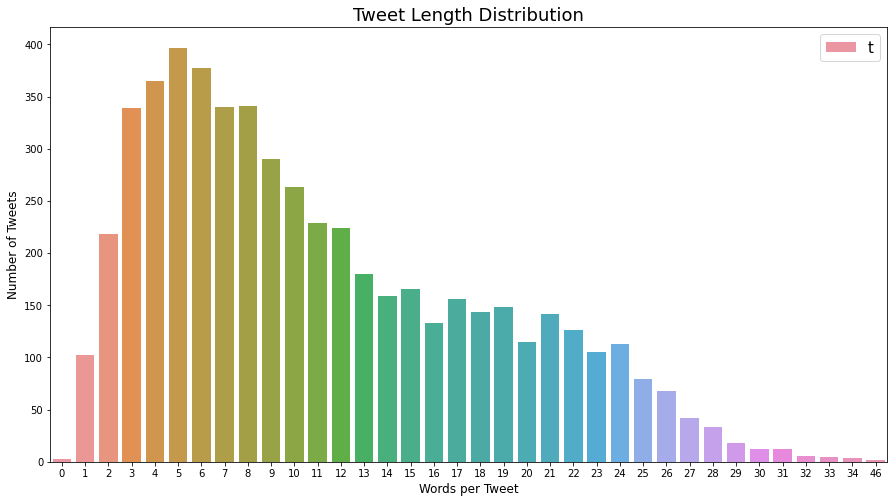

In [111]:
plt.figure(figsize = (15,8))
sns.countplot(sentence_lengths, data = df)
plt.title('Tweet Length Distribution', fontsize = 18)
plt.legend('tweet length', fontsize = 15)
plt.xlabel('Words per Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize =12)
plt.show()